In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load Data

purchase_behaviour_df=pd.read_csv('purchase_behaviour.csv')
transaction_data_df=pd.read_csv('transaction_data.csv')

In [4]:
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
purchase_behaviour_df.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [6]:
transaction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
transaction_data_df.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


# Top 3 Profitable products


In [11]:
top_products=(
    transaction_data_df.groupby(["PROD_NBR","PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES",ascending=False)
)

In [12]:
top_products

,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
101,102,Kettle Mozzarella Basil & Pesto 175g,34457.4
6,7,Smiths Crinkle Original 330g,34302.6
...,...,...,...
91,92,WW Crinkle Cut Chicken 175g,4702.2
94,95,Sunbites Whlegrn Crisps Frch/Onin 90g,4600.2
71,72,WW Crinkle Cut Original 175g,4532.2
34,35,Woolworths Mild Salsa 300g,4234.5


In [13]:
top_3_products=top_products.head(3)

In [15]:
print("Top 3 Most Profitable Products:")
print()
print(top_3_products)

Top 3 Most Profitable Products:

    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


# Most Loyal Customers(Highest Spenders)

In [16]:
loyal_customers=(
    transaction_data_df.groupby(["LYLTY_CARD_NBR"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES",ascending=False)
)

In [17]:
loyal_customers

,LYLTY_CARD_NBR,TOT_SALES
59694,226000,1300.0
60925,230078,138.6
17292,63197,132.8
69017,259009,127.2
42813,162039,126.8
...,...,...
14041,51251,1.5
11310,41089,1.5
518,2272,1.5
49909,186361,1.5


In [18]:
loyal_customers=loyal_customers.merge(purchase_behaviour_df,on="LYLTY_CARD_NBR")

In [19]:
loyal_customers

,LYLTY_CARD_NBR,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,226000,1300.0,OLDER FAMILIES,Premium
1,230078,138.6,OLDER FAMILIES,Budget
2,63197,132.8,OLDER FAMILIES,Budget
3,259009,127.2,OLDER SINGLES/COUPLES,Mainstream
4,162039,126.8,OLDER FAMILIES,Mainstream
...,...,...,...,...
72632,51251,1.5,OLDER SINGLES/COUPLES,Budget
72633,41089,1.5,YOUNG SINGLES/COUPLES,Premium
72634,2272,1.5,YOUNG SINGLES/COUPLES,Budget
72635,186361,1.5,MIDAGE SINGLES/COUPLES,Budget


In [20]:
loyal_customers_summary=(
    loyal_customers.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES",ascending=False)
)

In [21]:
print("Most Loyal Customers by spending")
print()
print(loyal_customers_summary.head(5))

Most Loyal Customers by spending

                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget  168363.25
19  YOUNG SINGLES/COUPLES       Mainstream  157621.60
13               RETIREES       Mainstream  155677.05
15         YOUNG FAMILIES           Budget  139345.85
9   OLDER SINGLES/COUPLES           Budget  136769.80


# Visualizing Results

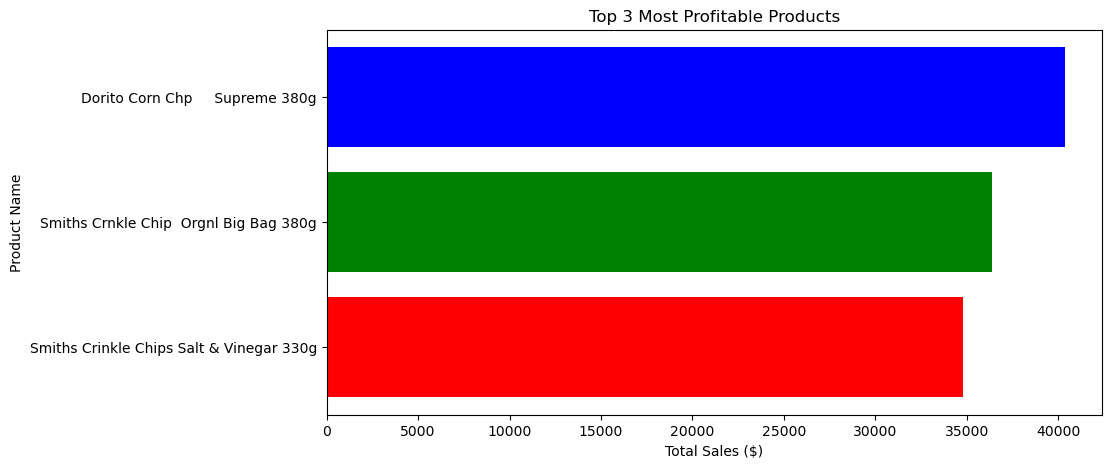

In [22]:
plt.figure(figsize=(10, 5))
plt.barh(top_3_products["PROD_NAME"], top_3_products["TOT_SALES"], color=["blue", "green", "red"])
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.gca().invert_yaxis()
plt.show()
